In [1]:
import sklearn.datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exploration and cleaning data

In [2]:
data = sklearn.datasets.fetch_california_housing(data_home=r'C:\Users\sus85\OneDrive\Desktop\CV\cv_David\CV_training\data_science\2_linear_regression', as_frame=True)

In [3]:
california_df = data.frame

In [4]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
california_df.shape

(20640, 9)

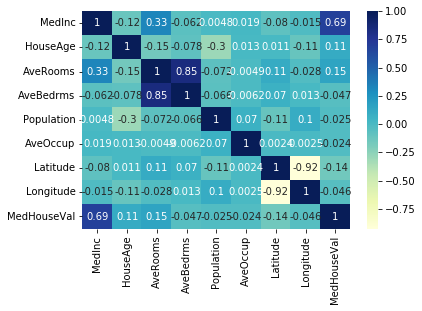

In [6]:
dataplot = sns.heatmap(california_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmapp
plt.show()

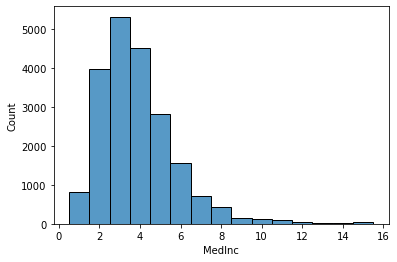

In [7]:
sns.histplot(data=california_df, x="MedInc", binwidth=1)

In [8]:
california_df.isna().sum() # No nan

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

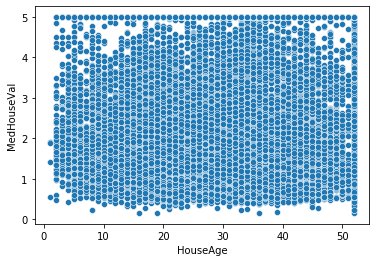

In [9]:
sns.scatterplot(data=california_df, x="HouseAge", y="MedHouseVal")

In [10]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


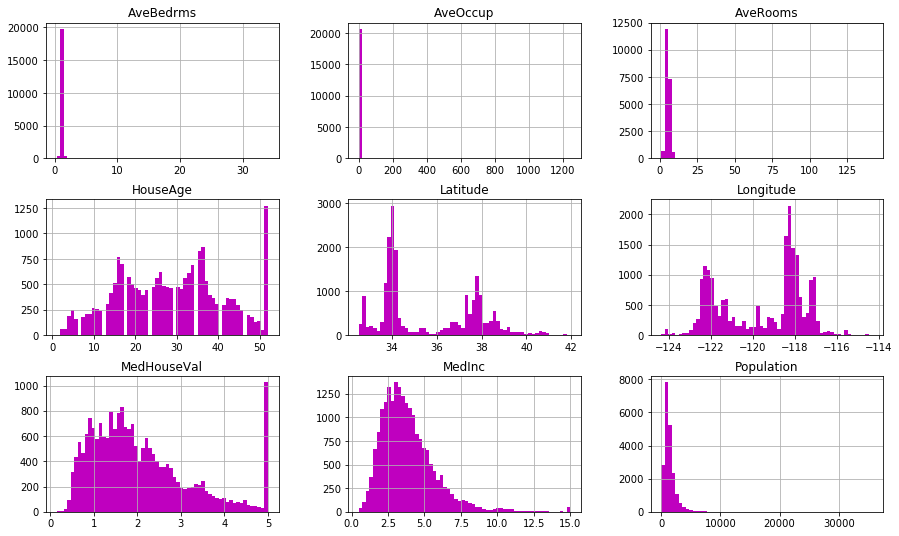

In [11]:
california_df.hist(bins=60, figsize=(15,9),color='m')
plt.show()

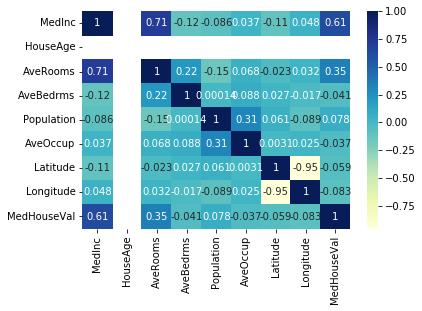

In [12]:
dataplot = sns.heatmap(california_df.loc[california_df.HouseAge >= 52].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmapp
plt.show()

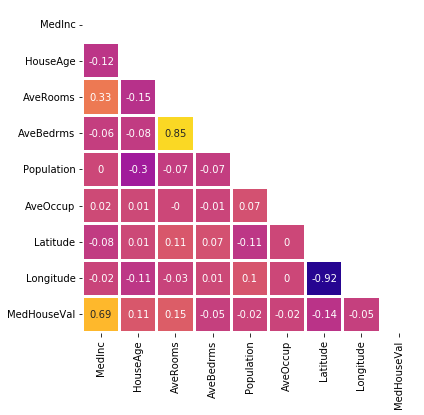

In [13]:
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  
corrMat(california_df) # plot masked numpy correlation matrix

In [14]:
california_df = california_df.loc[california_df.HouseAge < 52]

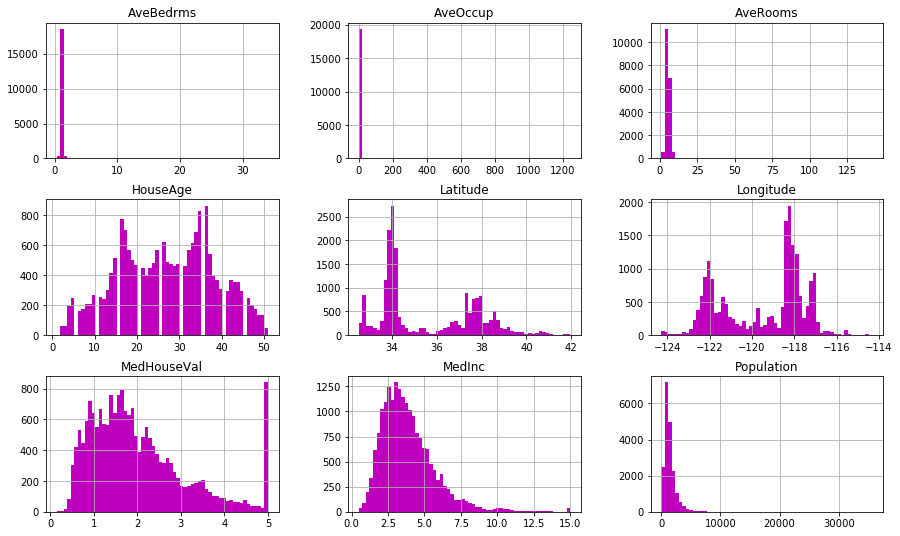

In [15]:
california_df.hist(bins=60, figsize=(15,9),color='m')
plt.show()

In [16]:
california_df = california_df.loc[california_df.MedHouseVal <= 5]

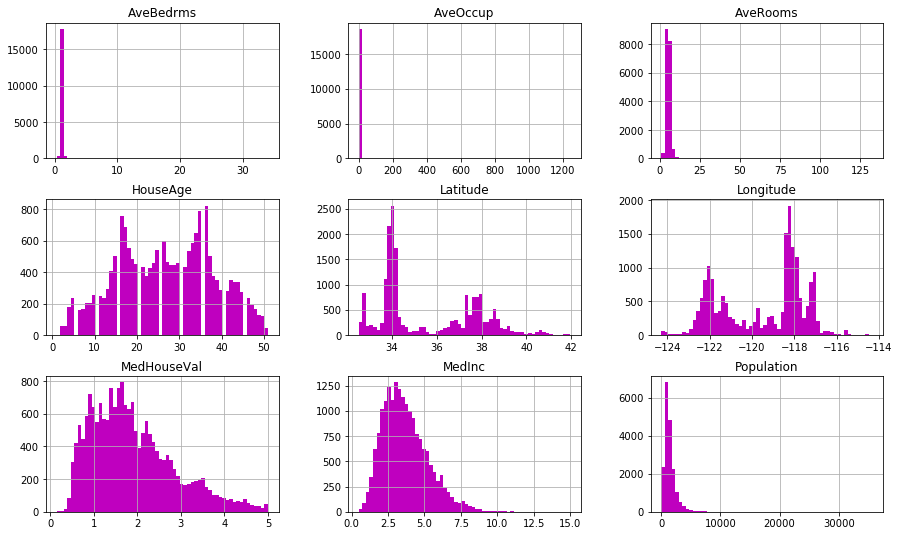

In [17]:
california_df.hist(bins=60, figsize=(15,9),color='m')
plt.show()

# data splitting

In [18]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(california_df, test_size=0.2, random_state=42)

# analytic way

In [19]:
train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
10502,3.5915,21.0,4.580913,1.107884,1423.0,2.952282,33.47,-117.70,3.056
18912,4.4529,10.0,6.006167,1.046696,4163.0,3.667841,38.15,-122.24,1.441
20555,3.1875,11.0,5.286179,1.013008,1700.0,2.764228,38.67,-121.80,1.720
13549,2.6307,36.0,4.803571,1.263393,773.0,3.450893,34.13,-117.31,0.664
8202,3.0453,25.0,4.141383,1.132095,2297.0,2.370485,33.79,-118.15,1.859
...,...,...,...,...,...,...,...,...,...
12494,1.2041,50.0,3.862605,1.156511,1223.0,1.461171,38.57,-121.47,1.681
13208,2.7321,31.0,4.703390,1.114407,1662.0,3.521186,34.05,-117.72,1.043
6113,1.5000,5.0,3.620579,1.016077,819.0,2.633441,34.13,-117.90,1.398
1121,2.7863,19.0,5.668817,1.124731,1184.0,2.546237,39.79,-121.58,1.086


In [20]:
test_X, test_y = test_df.drop(columns='MedHouseVal', axis=1), test_df.MedHouseVal

In [21]:
def fit_analyticly(data):
    mean_x = data.MedInc.values.mean()
    mean_y = data.MedHouseVal.values.mean()
    x = data.MedInc - mean_x
    y = data.MedHouseVal - mean_y
    beta_1 = sum(x*y) / sum(x**2)
    beta_0 = mean_y - beta_1 * mean_x
    return beta_1, beta_0

beta_1, beta_0 = fit_analyticly(train_df)
y_hat = beta_0 + beta_1* train_df.MedInc

In [22]:
y_hat_test = beta_0 + beta_1* test_df.MedInc

In [23]:
print(sum((test_y - y_hat_test)**2))

1981.8774023359454


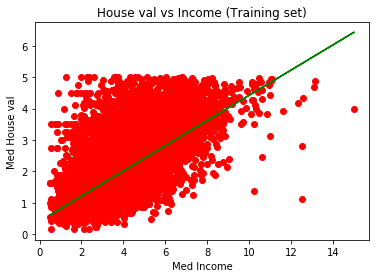

In [24]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "red")
plt.plot(train_df.MedInc, y_hat, color = "green")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

# iterative way

In [25]:
from tqdm import tqdm
def fit_sequantialy(data, epochs):
    # init beta_0 and beta_1
    beta_0 = 0
    beta_1 = 0
    lr = 1e-3
    x = data.MedInc
    y = data.MedHouseVal

    
    for i in tqdm(range(epochs)):
        error = sum((y - beta_0 - beta_1 * x)**2)
        derivate_beta_0 = sum( 2 * (y - beta_0 - beta_1 * x) * (-1)) / x.shape[0]
        derivate_beta_1 = sum( 2 * (y - beta_0 - beta_1 * x) * (-x)) / x.shape[0]
        beta_0 -= lr* derivate_beta_0
        beta_1 -= lr* derivate_beta_1
        if (abs(lr* derivate_beta_0) < 0.000001) and (abs(lr* derivate_beta_1) < 0.000001):
            print(error)
            print(i)
            break
        
    return beta_0, beta_1

beta_0, beta_1 = fit_sequantialy(train_df, 100000)
        

 15%|█▌        | 15381/100000 [02:25<13:21, 105.64it/s]

7613.063392113801
15381


In [26]:
y_hat = beta_0 + beta_1* train_df.MedInc

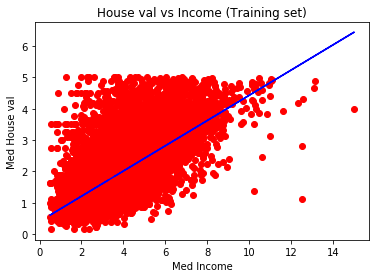

In [27]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "red")
plt.plot(train_df.MedInc, y_hat, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [28]:
y_hat_test = beta_0 + beta_1* test_df.MedInc

In [29]:
print(sum((test_y - y_hat_test)**2))

1981.8470380752958


# sklearn way

In [30]:
from sklearn.linear_model import LinearRegression
X, y = train_df.MedInc.values.reshape(-1,1), train_df.MedHouseVal.values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

In [31]:
beta_1 = reg.coef_[0][0]
beta_0 = 0
y_hat = beta_0 + beta_1* train_df.MedInc

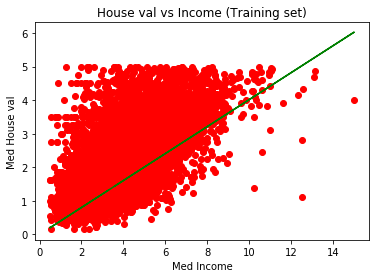

In [32]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "red")
plt.plot(train_df.MedInc, y_hat, color = "green")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [33]:
# medinc=3
reg.predict([[3]])

array([[1.61227902]])

In [34]:
new_test_X = test_X.MedInc.values

In [35]:
new_test_X.reshape(-1,1)

array([[3.9318],
       [4.6932],
       [4.8125],
       ...,
       [4.6146],
       [5.485 ],
       [4.125 ]])

In [36]:
y_test_hat = reg.predict(new_test_X.reshape(-1,1))

In [37]:
print('error:',sum((test_y.values - y_test_hat.reshape(-1))**2))

error: 1981.8774023359442


# new feature

In [38]:
X = np.array([(train_df.MedInc*2).values, train_df.MedInc.values])

In [39]:
reg = LinearRegression().fit(X.T, y)


In [40]:
reg.coef_

array([[0.16055849, 0.08027924]])

In [41]:
new_test_X = np.array([(test_X.MedInc*2).values, test_X.MedInc.values])

In [42]:
new_test_X.T

array([[ 7.8636,  3.9318],
       [ 9.3864,  4.6932],
       [ 9.625 ,  4.8125],
       ...,
       [ 9.2292,  4.6146],
       [10.97  ,  5.485 ],
       [ 8.25  ,  4.125 ]])

In [43]:
y_test_hat = reg.predict(new_test_X.T)

In [44]:
print('error:',sum((test_y.values - y_test_hat.reshape(-1))**2))

error: 1981.8774023359445


# ALL features except population

In [45]:
X = train_df.drop(['Population','MedHouseVal'],axis=1)

In [46]:
reg = LinearRegression().fit(X, y)

In [47]:
reg.coef_

array([[ 0.42447187,  0.00546421, -0.10324789,  0.57067008, -0.00358851,
        -0.36748014, -0.37725559]])

In [48]:
new_test_X = test_X.drop(columns='Population', axis=1)

In [49]:
y_test_hat = reg.predict(new_test_X)

In [50]:
print('error:',sum((test_y.values - y_test_hat.reshape(-1))**2))

error: 1466.9517536587837


In [51]:
def fit_sequantialy_parabloic(data, epochs):
    # init beta_0 and beta_1
    beta_0 = 0
    beta_1 = 0
    beta_2 = 0
    lr = 1e-3
    x = data.MedInc
    y = data.MedHouseVal

    
    for i in tqdm(range(epochs)):
        error = sum((y - beta_0 - beta_1 * x - beta_2 * (x**2))**2)
        derivate_beta_0 = sum( 2 * (y - beta_0 - beta_1 * x - beta_2 * (x**2)) * (-1)) / x.shape[0]
        derivate_beta_1 = sum( 2 * (y - beta_0 - beta_1 * x - beta_2 * (x**2)) * (-x))/ x.shape[0]
        derivate_beta_2 = sum( 2 * (y - beta_0 - beta_1 * x - beta_2 * (x**2)) * (-(x**2)))/ x.shape[0]
        beta_0 -= lr* derivate_beta_0
        beta_1 -= lr* derivate_beta_1
        beta_2 -= lr* derivate_beta_2                       
        if (abs(lr* derivate_beta_0) < 0.000001) and (abs(lr* derivate_beta_1) < 0.000001) and abs(lr* derivate_beta_2) < 0.000001:
            print(error)
            print(i)
            break
        
    return beta_0, beta_1, beta_2

beta_0, beta_1, beta_2 = fit_sequantialy_parabloic(train_df, 100000)

 36%|███▌      | 35892/100000 [08:48<15:43, 67.94it/s]s]

7613.0298960714235
35892


In [52]:
y_hat_train = beta_0 + beta_1* (train_df.MedInc) + beta_2* ((train_df.MedInc) ** 2)

In [53]:
y_hat_test = beta_0 + beta_1* (test_df.MedInc) + beta_2* ((test_df.MedInc) ** 2)

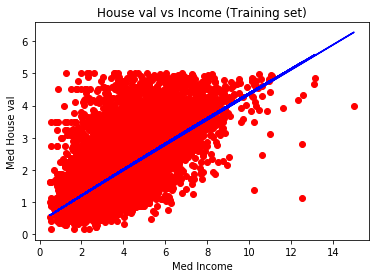

In [54]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "red")
plt.plot(train_df.MedInc, y_hat_train, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

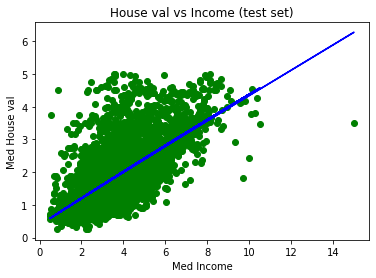

In [55]:
plt.scatter(test_df.MedInc, test_df.MedHouseVal, color = "green")
plt.plot(test_df.MedInc, y_hat_test, color = "blue")
plt.title("House val vs Income (test set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [56]:
sum((test_y - y_hat_test)**2)

1981.3473424082465

In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

poly_features = poly.fit_transform(train_df.MedInc.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, train_df.MedHouseVal)

LinearRegression()

In [139]:
train_df.MedInc.values.reshape(-1, 1)

array([[3.5915],
       [4.4529],
       [3.1875],
       ...,
       [1.5   ],
       [2.7863],
       [3.2806]])

In [140]:
poly.fit_transform(train_df.MedInc.values.reshape(-1, 1))

array([[1.00000000e+00, 3.59150000e+00, 1.28988723e+01, 4.63262997e+01,
        1.66380905e+02, 5.97557021e+02],
       [1.00000000e+00, 4.45290000e+00, 1.98283184e+01, 8.82935190e+01,
        3.93162211e+02, 1.75071201e+03],
       [1.00000000e+00, 3.18750000e+00, 1.01601562e+01, 3.23854980e+01,
        1.03228775e+02, 3.29041720e+02],
       ...,
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00,
        5.06250000e+00, 7.59375000e+00],
       [1.00000000e+00, 2.78630000e+00, 7.76346769e+00, 2.16313500e+01,
        6.02714306e+01, 1.67934287e+02],
       [1.00000000e+00, 3.28060000e+00, 1.07623364e+01, 3.53069207e+01,
        1.15827884e+02, 3.79984956e+02]])

In [141]:
y_hat_train = poly_reg_model.predict(poly_features)

In [142]:
import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(train_df.MedInc,y_hat_train), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

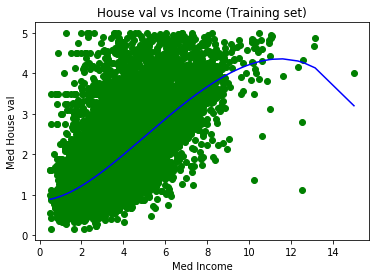

In [143]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "green")
plt.plot(x, y_poly_pred, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [144]:
poly_features_test = poly.fit_transform(test_df.MedInc.values.reshape(-1, 1))

In [145]:
y_hat_test = poly_reg_model.predict(poly_features_test)

In [146]:
print('error:',sum((test_y.values - y_hat_test.reshape(-1))**2))

error: 1966.7958158918748


In [147]:
sorted_zip = sorted(zip(test_df.MedInc,y_hat_test), key=sort_axis)
x_test, y_poly_pred_test = zip(*sorted_zip)

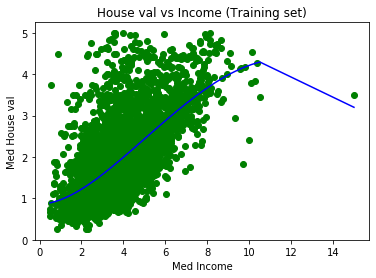

In [148]:
plt.scatter(test_df.MedInc, test_df.MedHouseVal, color = "green")
plt.plot(x_test, y_poly_pred_test, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

# Ridge

In [64]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(poly_features, train_df.MedHouseVal)

Ridge(alpha=0.5)

In [65]:
y_hat_train = model_ridge.predict(poly_features)

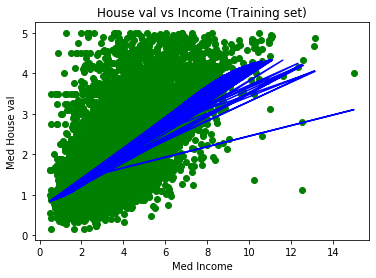

In [66]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "green")
plt.plot(train_df.MedInc, y_hat_train, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [67]:
y_hat_test = model_ridge.predict(poly_features_test)

In [68]:
print('error:',sum((test_y.values - y_hat_test.reshape(-1))**2))

error: 1966.3843315788486


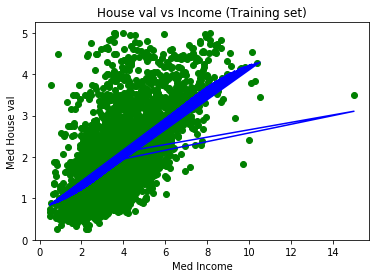

In [69]:
plt.scatter(test_df.MedInc, test_df.MedHouseVal, color = "green")
plt.plot(test_df.MedInc, y_hat_test, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

# Lasso

In [70]:
from sklearn.linear_model import Lasso
model_Lasso = Lasso(alpha=0.2)
model_Lasso.fit(poly_features, train_df.MedHouseVal)

Lasso(alpha=0.2)

In [71]:
y_hat_train = model_Lasso.predict(poly_features)

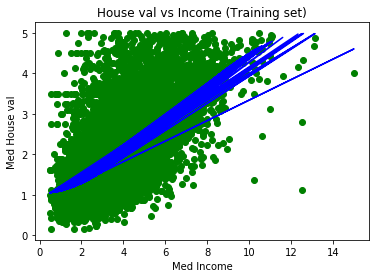

In [72]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "green")
plt.plot(train_df.MedInc, y_hat_train, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [73]:
y_hat_test = model_Lasso.predict(poly_features_test)

In [74]:
print('error:',sum((test_y.values - y_hat_test.reshape(-1))**2))

error: 1985.9284345607284


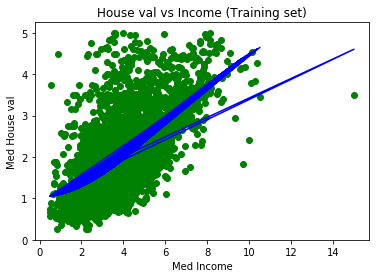

In [75]:
plt.scatter(test_df.MedInc, test_df.MedHouseVal, color = "green")
plt.plot(test_df.MedInc, y_hat_test, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [76]:
train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
10502,3.5915,21.0,4.580913,1.107884,1423.0,2.952282,33.47,-117.70,3.056
18912,4.4529,10.0,6.006167,1.046696,4163.0,3.667841,38.15,-122.24,1.441
20555,3.1875,11.0,5.286179,1.013008,1700.0,2.764228,38.67,-121.80,1.720
13549,2.6307,36.0,4.803571,1.263393,773.0,3.450893,34.13,-117.31,0.664
8202,3.0453,25.0,4.141383,1.132095,2297.0,2.370485,33.79,-118.15,1.859
...,...,...,...,...,...,...,...,...,...
12494,1.2041,50.0,3.862605,1.156511,1223.0,1.461171,38.57,-121.47,1.681
13208,2.7321,31.0,4.703390,1.114407,1662.0,3.521186,34.05,-117.72,1.043
6113,1.5000,5.0,3.620579,1.016077,819.0,2.633441,34.13,-117.90,1.398
1121,2.7863,19.0,5.668817,1.124731,1184.0,2.546237,39.79,-121.58,1.086


In [77]:
X = train_df.drop(columns=['MedHouseVal','AveOccup'], axis=1)
# new_features = poly.fit_transform(X.reshape(-1, 2))

In [78]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0)
model_ridge.fit(X, train_df.MedHouseVal)
# model_ridge.fit(X.reshape(-1,2), train_df.MedHouseVal)

Ridge(alpha=0)

In [79]:
model_ridge.coef_

array([ 4.21567969e-01,  5.15164314e-03, -1.00810809e-01,  5.60273892e-01,
       -5.73369547e-06, -3.71331337e-01, -3.80757532e-01])

In [80]:
y_hat_train = model_ridge.predict(X)

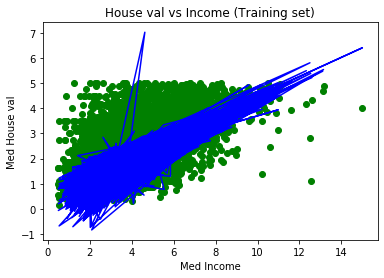

In [81]:
plt.scatter(train_df.MedInc, train_df.MedHouseVal, color = "green")
plt.plot(train_df.MedInc, y_hat_train, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()

In [82]:
X_test = test_df.drop(columns=['MedHouseVal','AveOccup'], axis=1)
# poly_features_test = poly.fit_transform(X_test.reshape(-1, 2))
y_hat_test = model_ridge.predict(X_test)

In [83]:
print('error:',sum((test_y.values - y_hat_test.reshape(-1))**2))

error: 1465.1831632168412


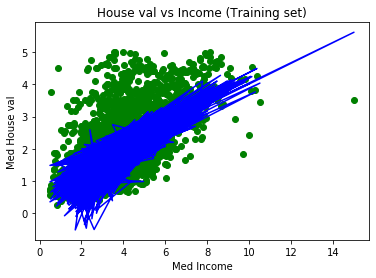

In [84]:
plt.scatter(test_df.MedInc, test_df.MedHouseVal, color = "green")
plt.plot(test_df.MedInc, y_hat_test, color = "blue")
plt.title("House val vs Income (Training set)")
plt.xlabel("Med Income")
plt.ylabel("Med House val")
plt.show()